<font size ='5'>E2E COURIER CHARGES ACCURACY ANALYSIS USING PYTHON</font>

<font size ='4'>STEP 1: Import the necessary python libraries and the datasets.</font>

In [2]:
#import pandas library first
import pandas as pd

#import the datsets next
order_report = pd.read_excel(r"C:\Users\mowan\Desktop\Datasets\E2E CourieR Charges\Order Report.xlsx")
sku_master = pd.read_excel(r"C:\Users\mowan\Desktop\Datasets\E2E CourieR Charges\SKU Master.xlsx")
pincode_mapping = pd.read_excel(r"C:\Users\mowan\Desktop\Datasets\E2E CourieR Charges\pincodes.xlsx")
courier_invoice = pd.read_excel(r"C:\Users\mowan\Desktop\Datasets\E2E CourieR Charges\Invoice.xlsx")
courier_company_rates = pd.read_excel(r"C:\Users\mowan\Desktop\Datasets\E2E CourieR Charges\Courier Company - Rates.xlsx")

#print them to confirm they've been imported succesfully.
print("Order Report:")
print(order_report.head())
print("\nSKU Master:")
print(sku_master.head())
print("\nPincode Mapping:")
print(pincode_mapping.head())
print("\nCourier Invoice:")
print(courier_invoice.head())
print("\nCourier Company rates:")
print(courier_company_rates.head())

Order Report:
   ExternOrderNo            SKU  Order Qty
0     2001827036  8904223818706          1
1     2001827036  8904223819093          1
2     2001827036  8904223819109          1
3     2001827036  8904223818430          1
4     2001827036  8904223819277          1

SKU Master:
             SKU  Weight (g)
0  8904223815682         210
1  8904223815859         165
2  8904223815866         113
3  8904223815873          65
4  8904223816214         120

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone
0             121003            507101    d
1             121003            486886    d
2             121003            532484    d
3             121003            143001    b
4             121003            515591    d

Courier Invoice:
        AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            

<font size = '4'>STEP 2: CHECK FOR MISSING VALUES</font>

In [32]:
# Check for missing values
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo    0
SKU              0
Order Qty        0
dtype: int64

Missing values in SKU Master:
SKU           0
Weight (g)    0
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

Missing values in Courier Invoice:
AWB Code                 0
Order ID                 0
Charged Weight           0
Warehouse Pincode        0
Customer Pincode         0
Zone                     0
Type of Shipment         0
Billing Amount (NGN.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_addition

<font size ='4'>STEP 3:LET'S MERGE THE ORDER REPORT AAND THE SKU MASTER DATASET ACCORDING TO THE COMMON SKU COLUMN and assign it to a new dataframe called 'merged_data'.</font>

In [9]:
#Why are we merging our datasets? In order to complete enrich our data and make it complete as one.

In [3]:
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706          1         127
1     2001827036  8904223819093          1         150
2     2001827036  8904223819109          1         100
3     2001827036  8904223818430          1         165
4     2001827036  8904223819277          1         350


<font size ='5'>STEP 4: The ‘ExternOrderNo’ is nothing but ‘Order Id’ in other datasets. Let’s rename this column:</font>

In [4]:
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})

<font size ='5'>STEP 5: Now let’s merge the courier invoice and pincode mapping dataset to achieve data completeness:</font>

In [5]:
'''
FIRST: We're removing rows from pincode_mapping that have duplicate values in the 'Customer Pincode' column 
and assigning it to a new dataframe called sigma_courier as input. 
This ensures that each pincode appears only once in the sigma_courier DataFrame. 
This is important if you want to avoid issues arising from duplicate pincode entries.
'''
sigma_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])

'''
NEXT: We're creating a new DataFrame called courier_sigma as input that contains only the 
columns 'Order ID', 'Customer Pincode', and 'Type of Shipment' that we're selecting from the courier_invoice DataFrame. 
These are the relevant columns we want to work with from courier_invoice.
'''
courier_sigma= courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]

'''
NEXT:We're creating a new DataFrame called 'pincodes' as input to performs a merge 
specifically, an inner join between the courier_sigma and sigma_courier DataFrames on='Customer Pincode' 
specifying that the merge should be performed based on the common column 'Customer Pincode' present in both DataFrames.
This merge operation helps us associate customer pin codes with their respective orders and shipping types.
'''
pincodes= courier_sigma.merge(sigma_courier,on='Customer Pincode')

#Lastly, we print the first five rows of the dataframe 'pincodes'
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


<font size ='5'>STEP 6: Now let’s merge the pin codes with the main dataframe:</font>

In [6]:
#Let's create a new dataframe called 'merged2' as input and perform the merging operation on 'order ID'.
merged2 = merged_data.merge(pincodes, on='Order ID')

<font size ='5'>STEP 7: Now let’s calculate the weight in kilograms by dividing the ‘Weight (g)’ column in the ‘merged2’ DataFrame by 1000:</font>

In [7]:
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000

<font size ='5'>STEP 8: Now let’s calculate the weight slabs.</font>

In [8]:
def weight_slab(weight):
    '''
FIRST: We define a function called weight_slab that takes one argument, weight. 
This function is designed to calculate a "weight slab" – a rounded-up weight value, for column 'Charged Weight' in the Courier Invoice Dataset.
'''
    i = round(weight % 1, 1)
    #Inside the function, we calculate the decimal part of the weight and round it upto one decimal place. The result is stored in the variable i as seen above.
    if i == 0.0:
        return weight
        #if the rounded decimal part i is exactly 0.0. This means the weight is a whole number and it returns the original weight without any change as seen above.
    elif i > 0.5:
        return int(weight) + 1.0
        '''
        If the rounded decimal part is greater than 0.5, these two lines above returns the integer part of the weight plus 1.0. 
        For example, if weight is 7.6, int(weight) is 7, and the function returns 8.0.
        This effectively rounds the weight up to the nearest whole number.
        '''
    else:
        return int(weight) + 0.5
        '''
        If the rounded decimal part is between 0 and 0.5 (inclusive of 0.5), the next two lines above returns the integer part of the weight plus 0.5. 
        For example, if weight is 7.3, int(weight) is 7, and the function returns 7.5. 
        This rounds the weight up to the nearest half-kilogram.
        '''
merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
'''
Next, we apply the weight_slab function to each value in the 'Weights (Kgs)' column.
Its result is then assigned to a new column in merged2 called 'Weight Slab (KG)'. This creates the weight slabs as seen below.
'''
courier_invoice['Weight Slab Charged by Courier Company']=(courier_invoice['Charged Weight']).apply(weight_slab)
'''
This next line does the same thing as the previous line.
We select the 'Charged Weight' column from the courier_invoice DataFrame
and apply the weight_slab function to each charged weight.
The results are stored in a new column called 'Weight Slab Charged by Courier Company' in the courier_invoice DataFrame.
'''

"\nThis next line does the same thing as the previous line.\nWe select the 'Charged Weight' column from the courier_invoice DataFrame\nand apply the weight_slab function to each charged weight.\nThe results are stored in a new column called 'Weight Slab Charged by Courier Company' in the courier_invoice DataFrame.\n"

<font size ='5'>STEP 9: Now let’s rename the columns to prepare the desired dataframe.</font>

In [9]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per SIGMA'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per SIGMA'})

In [18]:
#Now, let's see our weight slab and delivery zones

In [10]:
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706          1         127            173213   
1  2001827036  8904223819093          1         150            173213   
2  2001827036  8904223819109          1         100            173213   
3  2001827036  8904223818430          1         165            173213   
4  2001827036  8904223819277          1         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per SIGMA  \
0  Forward charges             121003                          e   
1  Forward charges             121003                          e   
2  Forward charges             121003                          e   
3  Forward charges             121003                          e   
4  Forward charges             121003                          e   

   Weights (Kgs)  Weight Slab As Per SIGMA  
0          0.127                       0.5  
1          0.150                       0.5  
2          0.100 

In [12]:
print(courier_invoice.head())

        AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            2.50             121003   
3  1091117223244  2001806458            1.00             121003   
4  1091117229345  2001807012            0.15             121003   

   Customer Pincode Delivery Zone Charged by Courier Company Type of Shipment  \
0            507101                                        d  Forward charges   
1            486886                                        d  Forward charges   
2            532484                                        d  Forward charges   
3            143001                                        b  Forward charges   
4            515591                                        d  Forward charges   

   Billing Amount (NGN.)  Weight Slab Charged by Courier Company  
0                 135000                   

<font size ='5'>STEP 10: Now let’s calculate the expected charges:</font>

In [13]:
total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per SIGMA']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per SIGMA']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per SIGMA']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':  
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)      
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))  
    else:                                                        
        total_expected_charge.append(0)                         

merged2['Expected Charge as per SIGMA'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706          1         127            173213   
1  2001827036  8904223819093          1         150            173213   
2  2001827036  8904223819109          1         100            173213   
3  2001827036  8904223818430          1         165            173213   
4  2001827036  8904223819277          1         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per SIGMA  \
0  Forward charges             121003                          e   
1  Forward charges             121003                          e   
2  Forward charges             121003                          e   
3  Forward charges             121003                          e   
4  Forward charges             121003                          e   

   Weights (Kgs)  Weight Slab As Per SIGMA  Expected Charge as per SIGMA  
0          0.127                       0.5                       96220.0  
1 

In [29]:
'''
Below is how the above code works:

1. In this code, we loop through each row of the ‘merged2’ DataFrame to calculate the expected charges based on ABC’s tariffs. 
We retrieve the necessary rates and parameters, such as fixed charges and 
surcharges per weight tier for forward and RTO shipments, based on the delivery area.
2. We then determine the weight of the slab for each row. If the shipment type is ‘Forward Charges’, 
we calculate the additional weight beyond the basic weight slab (0.5 KG) and apply the corresponding additional charges. 
For “Forward and RTO Charges” shipments, we consider additional charges for term and RTO components.
3. Finally, we store the calculated expected charges in the “Expected charges according to ABC” column of the “merged2” DataFrame. 
This allows us to compare the expected charges with the charges billed to analyze the accuracy of the courier company’s charges.
'''

'\nBelow is how the above code works:\n\n1. In this code, we loop through each row of the ‘merged2’ DataFrame to calculate the expected charges based on ABC’s tariffs. \nWe retrieve the necessary rates and parameters, such as fixed charges and \nsurcharges per weight tier for forward and RTO shipments, based on the delivery area.\n2. We then determine the weight of the slab for each row. If the shipment type is ‘Forward Charges’, \nwe calculate the additional weight beyond the basic weight slab (0.5 KG) and apply the corresponding additional charges. \nFor “Forward and RTO Charges” shipments, we consider additional charges for term and RTO components.\n3. Finally, we store the calculated expected charges in the “Expected charges according to ABC” column of the “merged2” DataFrame. \nThis allows us to compare the expected charges with the charges billed to analyze the accuracy of the courier company’s charges.\n'

<font size ='5'>STEP 11: Now let’s merge 'Merged2' Dataframe with the courier invoice to display a new dataframe called 'merged_output':</font>

In [14]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706          1         127              173213   
1  2001827036  8904223819093          1         150              173213   
2  2001827036  8904223819109          1         100              173213   
3  2001827036  8904223818430          1         165              173213   
4  2001827036  8904223819277          1         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per SIGMA  \
0    Forward charges               121003                          e   
1    Forward charges               121003                          e   
2    Forward charges               121003                          e   
3    Forward charges               121003                          e   
4    Forward charges               121003                          e   

   Weights (Kgs)  Weight Slab As Per SIGMA  Expected Charge as per SIGMA  \
0          0.127                       0

<font size ='5'>STEP 12: Now let’s calculate the differences in charges and expected charges for each order:</font>

In [15]:
df_diff = merged_output
df_diff['Difference (NGN.)'] = df_diff['Billing Amount (NGN.)'] - df_diff['Expected Charge as per SIGMA']

df_new = df_diff[['Order ID', 'Billing Amount (NGN.)', 'Expected Charge as per SIGMA', 'Difference (NGN.)']]

print(df_new.head())
'''
This code takes a DataFrame (merged_output), calculates the difference between billing amounts and expected charges,
and then creates a new DataFrame (df_new) containing the order ID, the billing amount, the expected charge and calculated difference
The print statement displays the first few rows of this new DataFrame. This is done to analyze discrepancies in billing.
'''

     Order ID  Billing Amount (NGN.)  Expected Charge as per SIGMA  \
0  2001827036                 117900                       96220.0   
1  2001827036                 117900                       96220.0   
2  2001827036                 117900                       96220.0   
3  2001827036                 117900                       96220.0   
4  2001827036                 117900                       96220.0   

   Difference (NGN.)  
0            21680.0  
1            21680.0  
2            21680.0  
3            21680.0  
4            21680.0  


'\nThis code takes a DataFrame (merged_output), calculates the difference between billing amounts and expected charges,\nand then creates a new DataFrame (df_new) containing the order ID, the billing amount, the expected charge and calculated difference\nThe print statement displays the first few rows of this new DataFrame. This is done to analyze discrepancies in billing.\n'

<font size ='5'>STEP 13: Now let’s summarize the accuracy of E2E courier charges based on the charged prices and expected prices.</font>

In [16]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (NGN.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (NGN.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (NGN.)'] < 0])
'''
This code analyzes the 'Difference (NGN.)' column to categorize orders based on whether they were correctly 
charged, overcharged, or undercharged. It then counts the number of orders in each category.  
The results are stored in the variables total_correctly_charged, total_overcharged, and total_undercharged
'''

"\nThis code analyzes the 'Difference (NGN.)' column to categorize orders based on whether they were correctly \ncharged, overcharged, or undercharged. It then counts the number of orders in each category.  \nThe results are stored in the variables total_correctly_charged, total_overcharged, and total_undercharged\n"

In [17]:
# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (NGN.)'] > 0]['Difference (NGN.)'].sum())
amount_undercharged = df_new[df_new['Difference (NGN.)'] < 0]['Difference (NGN.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (NGN.)'] == 0]['Expected Charge as per SIGMA'].sum()
'''
This code calculates the total amounts associated with overcharging, undercharging, and correctly charged orders. 
'''

'\nThis code calculates the total amounts associated with overcharging, undercharging, and correctly charged orders. \n'

In [18]:
# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where SIGMA has been correctly charged',
                                'Total Orders where SIGMA has been overcharged',
                                'Total Orders where SIGMA has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (NGN.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}


In [19]:
#Then we create a Pandas DataFrame named df_summary from the data stored in the variable summary_data and of course print it.
df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (NGN.)
0  Total Orders where SIGMA has been correctly ch...      0            0.0
1      Total Orders where SIGMA has been overcharged    354     23742040.0
2     Total Orders where SIGMA has been undercharged     47     -1242780.0


<font size ='5'>STEP 14: Let's visualize the proportion of errors using plotly.</font>

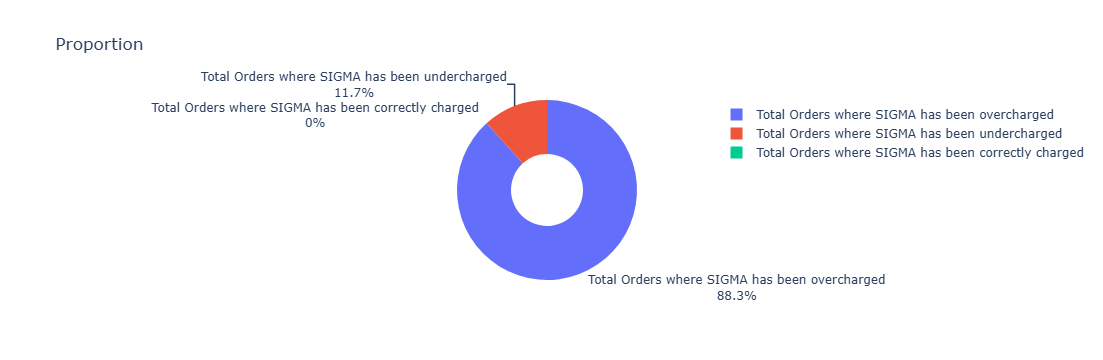

In [39]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()

<font size ='5'>STEP 15: Let's compare our charge differences by specific delivery zones.</font>

In [21]:
'''
FIRST, Let's merge "merged_output" DataFrame and "df_new" dataframe together to create a combined DataFrame that has the columns we need:
columns 'Delivery Zone Charged by Courier Company' and 'Difference (NGN.)'. Let's name it 'merged_df'
'''

merged_df = pd.merge(merged_output, df_new, on='Order ID')
print(merged_df.head())


     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706          1         127              173213   
1  2001827036  8904223818706          1         127              173213   
2  2001827036  8904223818706          1         127              173213   
3  2001827036  8904223818706          1         127              173213   
4  2001827036  8904223818706          1         127              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per SIGMA  \
0    Forward charges               121003                          e   
1    Forward charges               121003                          e   
2    Forward charges               121003                          e   
3    Forward charges               121003                          e   
4    Forward charges               121003                          e   

   Weights (Kgs)  Weight Slab As Per SIGMA  ...  Warehouse Pincode_y  \
0          0.127                       0.5  

In [36]:
'''
Then, we group our 'Difference (NGN.)_y' by 'Delivery Zone Charged by Courier Company'
'''

zone_differences = merged_df.groupby('Delivery Zone Charged by Courier Company')['Difference (NGN.)_y'].mean().reset_index()


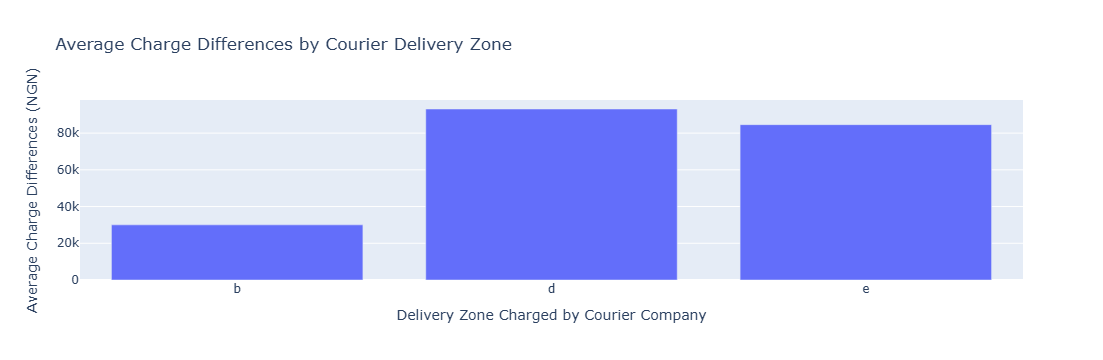

In [37]:
'''
Let's use plotly.express to create a bar chart for our charge differences accross delivery zone.
'''
import plotly.express as px

fig = px.bar(zone_differences,
             x='Delivery Zone Charged by Courier Company',
             y='Difference (NGN.)_y',
             title='Average Charge Differences by Courier Delivery Zone',
             labels={'Difference (NGN.)_y': 'Average Charge Differences (NGN)'})

fig.show()

In [ ]:
'''
The chart above shows us that delivery zones d and e were overcharged by courier companies.
'''

<font size='5'>STEP 16: Let's create a scatter plot diagram showing the relationship between the 'Weight Slab as per SIGMA' and the 'Weight Slab charged by Courier Companies' which contributed to our charge differences.</font>

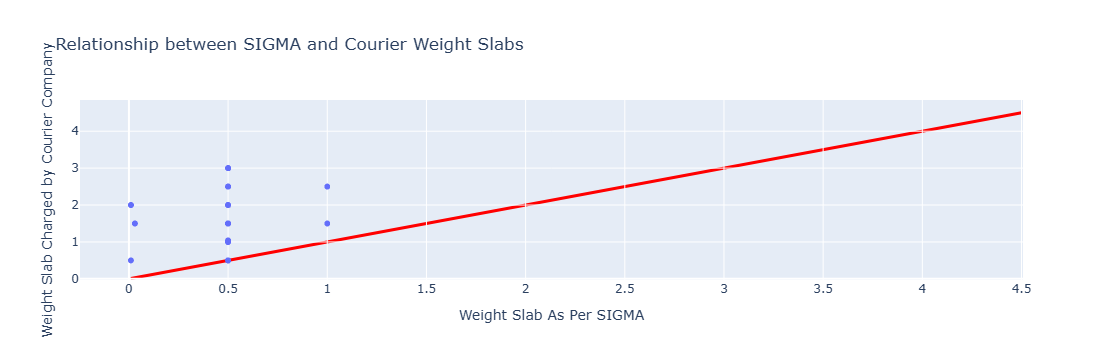

In [53]:
import plotly.express as px

def create_plotly_scatter_with_diagonal(data):
    """Creates a Plotly scatter plot with a very visible diagonal line."""

    if not isinstance(data, pd.DataFrame):
        print("Input data must be a pandas DataFrame.")
        return

    if 'Weight Slab As Per SIGMA' not in data.columns or 'Weight Slab Charged by Courier Company' not in data.columns:
        print("DataFrame must contain 'Weight Slab As Per SIGMA' and 'Weight Slab Charged by Courier Company' columns.")
        return

    fig = px.scatter(data, x='Weight Slab As Per SIGMA', y='Weight Slab Charged by Courier Company',
                     title='Relationship between SIGMA and Courier Weight Slabs')

    # Calculate the min and max values for the diagonal line
    min_val = min(data['Weight Slab As Per SIGMA'].min(), data['Weight Slab Charged by Courier Company'].min())
    max_val = max(data['Weight Slab As Per SIGMA'].max(), data['Weight Slab Charged by Courier Company'].max())

    # Make the diagonal line very thick
    fig.add_shape(
        type="line",
        x0=min_val,
        y0=min_val,
        x1=max_val,
        y1=max_val,
        line=dict(
            color="red",  # Bright red color
            width=3,      # Thicker line
        ),
        layer="below" #places the line below the points.
    )

    fig.show()

create_plotly_scatter_with_diagonal(merged_df)

In [ ]:
'''
The scatter plot above shows the relationship between the two weight slab columns.

If the points fall along a straight diagonal line, it means there's a strong correlation (no charge differences).

If the points are scattered, it indicates differences between the weight slabs.

Points above the diagonal mean that the courier charged a higher weight slab. 

Points below the diagonal mean that the courier charged a lower weight slab than SIGMA.

So, according to our diagram, the points fall above the diagonal which confirms that the ccourier companies charged a higher weight slab
and the only place where there no charge difference is at the point where both weight slabs were 0.5 and fell along a straight diagonal line.
'''